In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py'>

In [2]:
out_dir = './'

In [3]:
all_df = pd.DataFrame()

In [4]:
simulation = False

In [2]:
in_dir = 'd75786f7-data-2018-01-25-big-experiment'

n_evidence = 4

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

raw_data = raw_data[raw_data['time_of_death'].isnull()]

data,fails,parts = utils.parse_data(raw_data)

NameError: name 'pd' is not defined

In [10]:
fails = utils.get_evidence_subset(fails, n_evidence)
data = data[data['net'] > 3]
        
df = utils.get_parsed_data(data, fails, parts)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


correlation with net evidence 0.555871757842
correlation with last evidence 0.526811919853


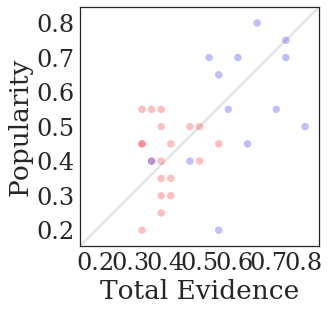

In [11]:
utils.make_plot(df, out_dir + 'pop-evidence.jpg', 1)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


correlation with net evidence 0.111666385894
correlation with last evidence 0.0757410232852


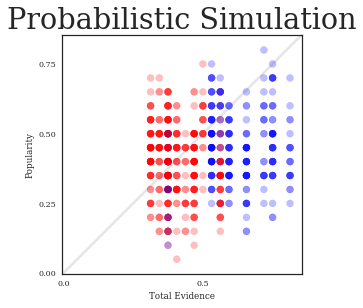

In [12]:
sim_df = pd.DataFrame()
n_reps = 20
for i in range(n_reps):
    sim_data = utils.simulate_data(data, fails, df['nets'], True)
    sim_df = pd.concat([sim_df,utils.get_parsed_data(sim_data, fails, parts)])

utils.make_plot(sim_df, out_dir + 'sim-stochastic-pop-evidence.jpg', 3, 'Probabilistic Simulation')

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


correlation with net evidence -0.133192747251
correlation with last evidence -0.32109756668


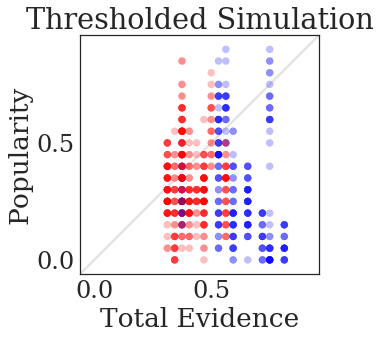

In [9]:
sim_df = pd.DataFrame()
n_reps = 20
for i in range(n_reps):
    sim_data = utils.simulate_data(data, fails, df['nets'], False)
    sim_df = pd.concat([sim_df,utils.get_parsed_data(sim_data, fails, parts)])

utils.make_plot(sim_df, out_dir + 'sim-deterministic-pop-evidence.jpg', 3, 'Thresholded Simulation')